In [1]:
import pandas as pd
import jqdatasdk as jq
import jqfactor_analyzer as ja
from user_functions import sma, ts_rank, ts_sum
import preparation

auth success 


e:\projects\alpha\venv\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


分位数统计


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,24.8,9.603315,6.083182,181,20.000000
2,3.6,56.8,22.140331,13.193752,181,20.000000
3,18.8,58.6,39.862637,9.360846,182,20.110497
4,21.8,59.8,45.847778,9.154597,180,19.889503
5,35.0,60.0,57.604420,4.778608,181,20.000000



-------------------------

收益分析


,period_1,period_5,period_20
Ann. alpha,0.053,0.080,0.022
beta,1.031,0.917,1.082
Mean Period Wise Return Top Quantile (bps),5.356,17.553,29.920
Mean Period Wise Return Bottom Quantile (bps),19.433,40.523,36.762
Mean Period Wise Spread (bps),-14.077,-13.755,-0.335


<Figure size 432x288 with 0 Axes>

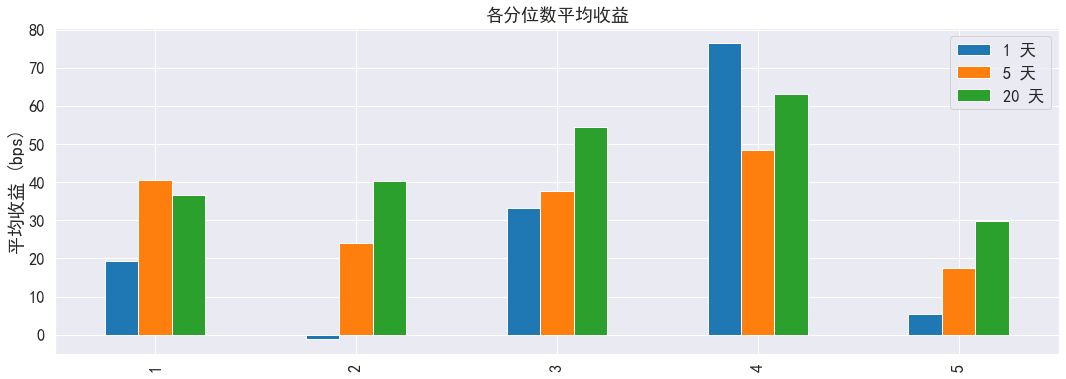

<Figure size 432x288 with 0 Axes>

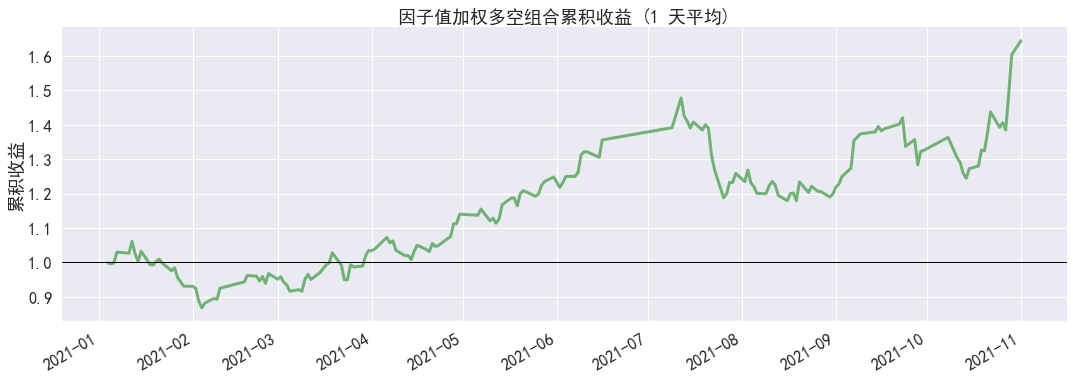

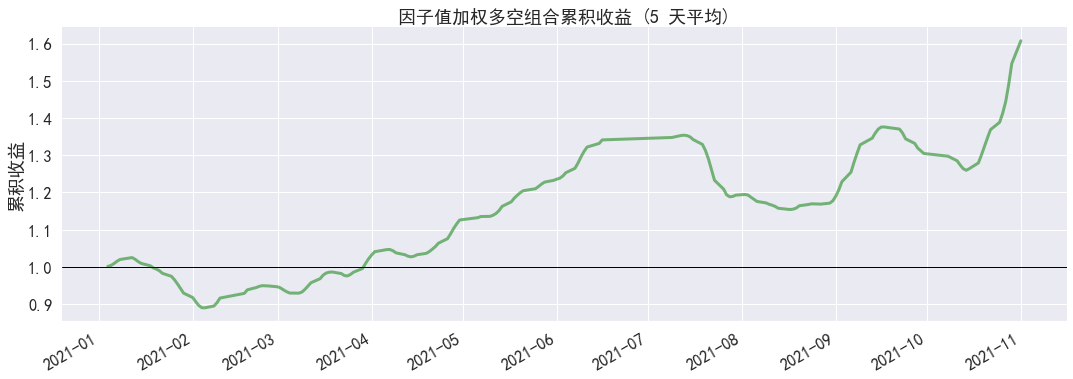

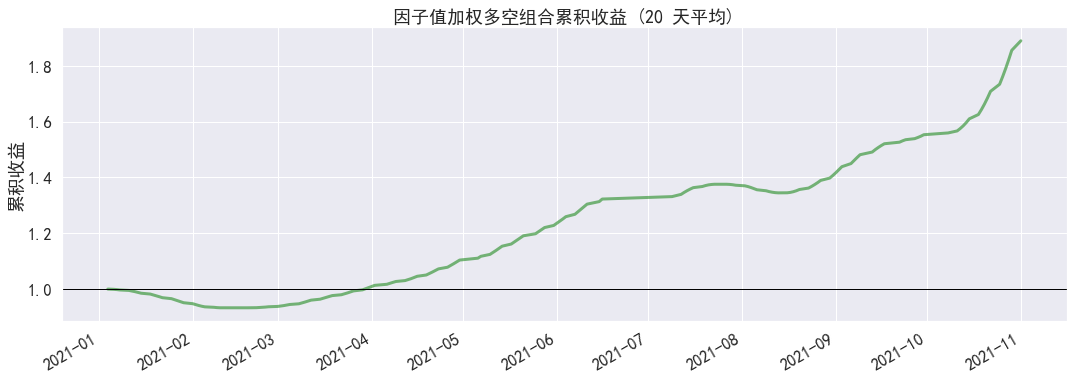

<Figure size 432x288 with 0 Axes>

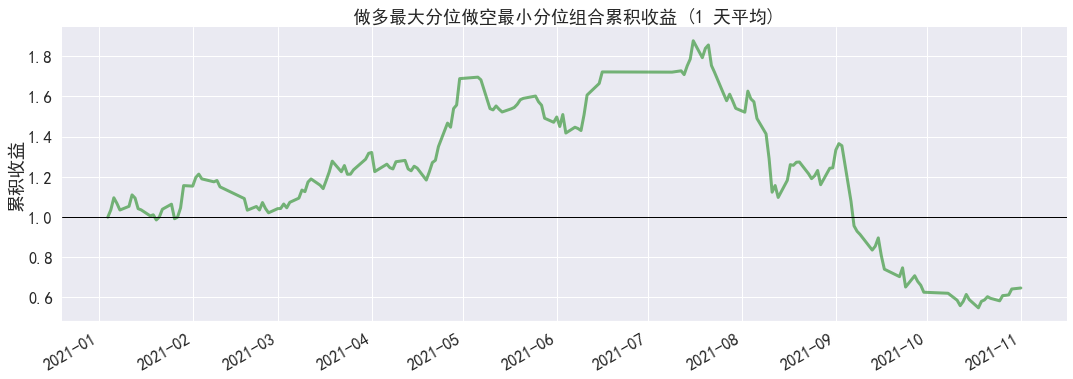

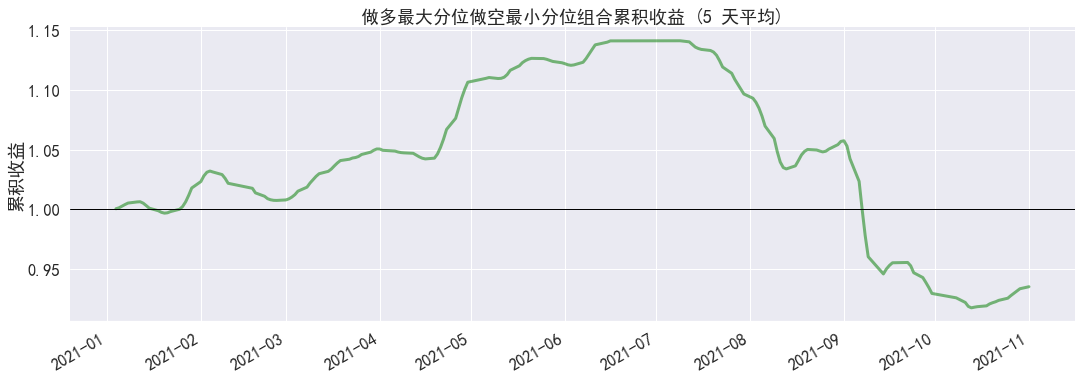

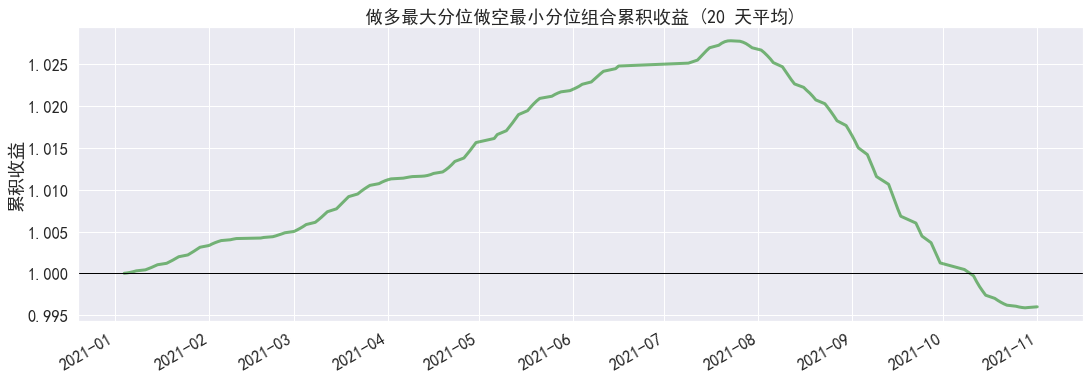

TypeError: __init__() got an unexpected keyword argument 'linthreshy'

<Figure size 432x288 with 0 Axes>

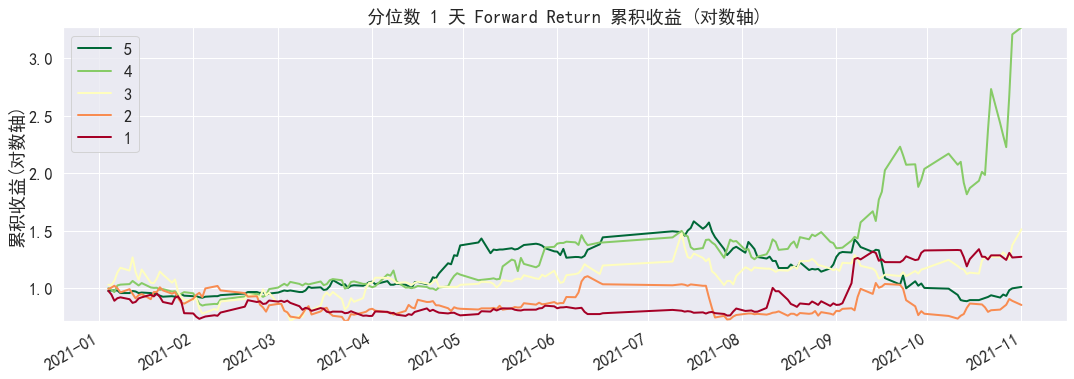

In [2]:
def alpha(vwap):
    return sma(ts_rank(ts_sum(vwap, 5), 60), 5)


start_date = '2021-01-01'
end_date = '2021-12-01'
periods = (1, 5, 20)
quantiles = 5
stock_list = ['300750.XSHE', '601919.XSHG', '600795.XSHG', '300052.XSHE', '600522.XSHG']
date_list = pd.read_csv('test_data.csv')['time'][:201].to_numpy().tolist()

stock_pool, _ = preparation.get()
data = stock_pool.transpose((2, 0, 1))[5]  # 6x5x201
factor_data = alpha(data).transpose((1, 0))  # 201x5
factor_data = pd.DataFrame(factor_data, columns=stock_list, index=pd.to_datetime(date_list))

jq.auth('18117328630', 'Simon123')
far = ja.analyze_factor(factor=factor_data,
                        weight_method='avg',
                        industry='jq_l1',
                        quantiles=quantiles,
                        periods=periods,
                        max_loss=0.25)

far.create_full_tear_sheet(
    demeaned=False, group_adjust=False, by_group=False,
    turnover_periods=None, avgretplot=(5, 15), std_bar=False
)